In [81]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
dataset = pd.read_csv('dataset/QUESIONER_PENELITIAN_MBTI_full_MBTI.csv')

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                                               37 non-null     object
 1   NAMA                                                                                                                                                    37 non-null     object
 2   KELAS                                                                                                                                                   37 non-null     obje

In [84]:
# mengubah nama kolom
data = dataset.rename(columns={
  '1. Ketika bekerja dalam kelompok, saya cenderung untuk.?':'pertanyaan_1',
  '2. Saya cenderung lebih suka.?':'pertanyaan_2',
  '3. Saat memecahkan masalah, saya lebih suka.?':'pertanyaan_3',
  '4. Saya cenderung memilih kegiatan yang.?':'pertanyaan_4',
  '5. Ketika membuat keputusan, saya lebih mengandalkan.?':'pertanyaan_5',
  '6) Apakah Anda lebih suka bekerja secara mandiri atau dalam tim?':'pertanyaan_6',
  '7) Saat Anda berada dalam suasana sosial yang ramai, apakah Anda cenderung menjadi pusat perhatian atau lebih memilih untuk berada di belakang layar.?':'pertanyaan_7',
  '8) Apakah Anda merasa lebih nyaman dengan jadwal yang terstruktur dan teratur atau lebih suka fleksibilitas dan spontanitas.?':'pertanyaan_8',
})
# data.info()

In [85]:
# memeriksa data duplikasi
data.duplicated().sum()

0

In [86]:
# hapus kolom yang tidak diperlukan
data =data.drop(columns=['Timestamp', 'NAMA', 'KELAS', 'pertanyaan_6' ,'pertanyaan_7','pertanyaan_8'],inplace=False)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pertanyaan_1  37 non-null     object
 1   pertanyaan_2  37 non-null     object
 2   pertanyaan_3  37 non-null     object
 3   pertanyaan_4  37 non-null     object
 4   pertanyaan_5  37 non-null     object
 5   MBTI          37 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB


In [16]:
# menyimpan dataset_mbti ke csv
# data.to_csv('dataset/dataset_mbti.csv', index=False)

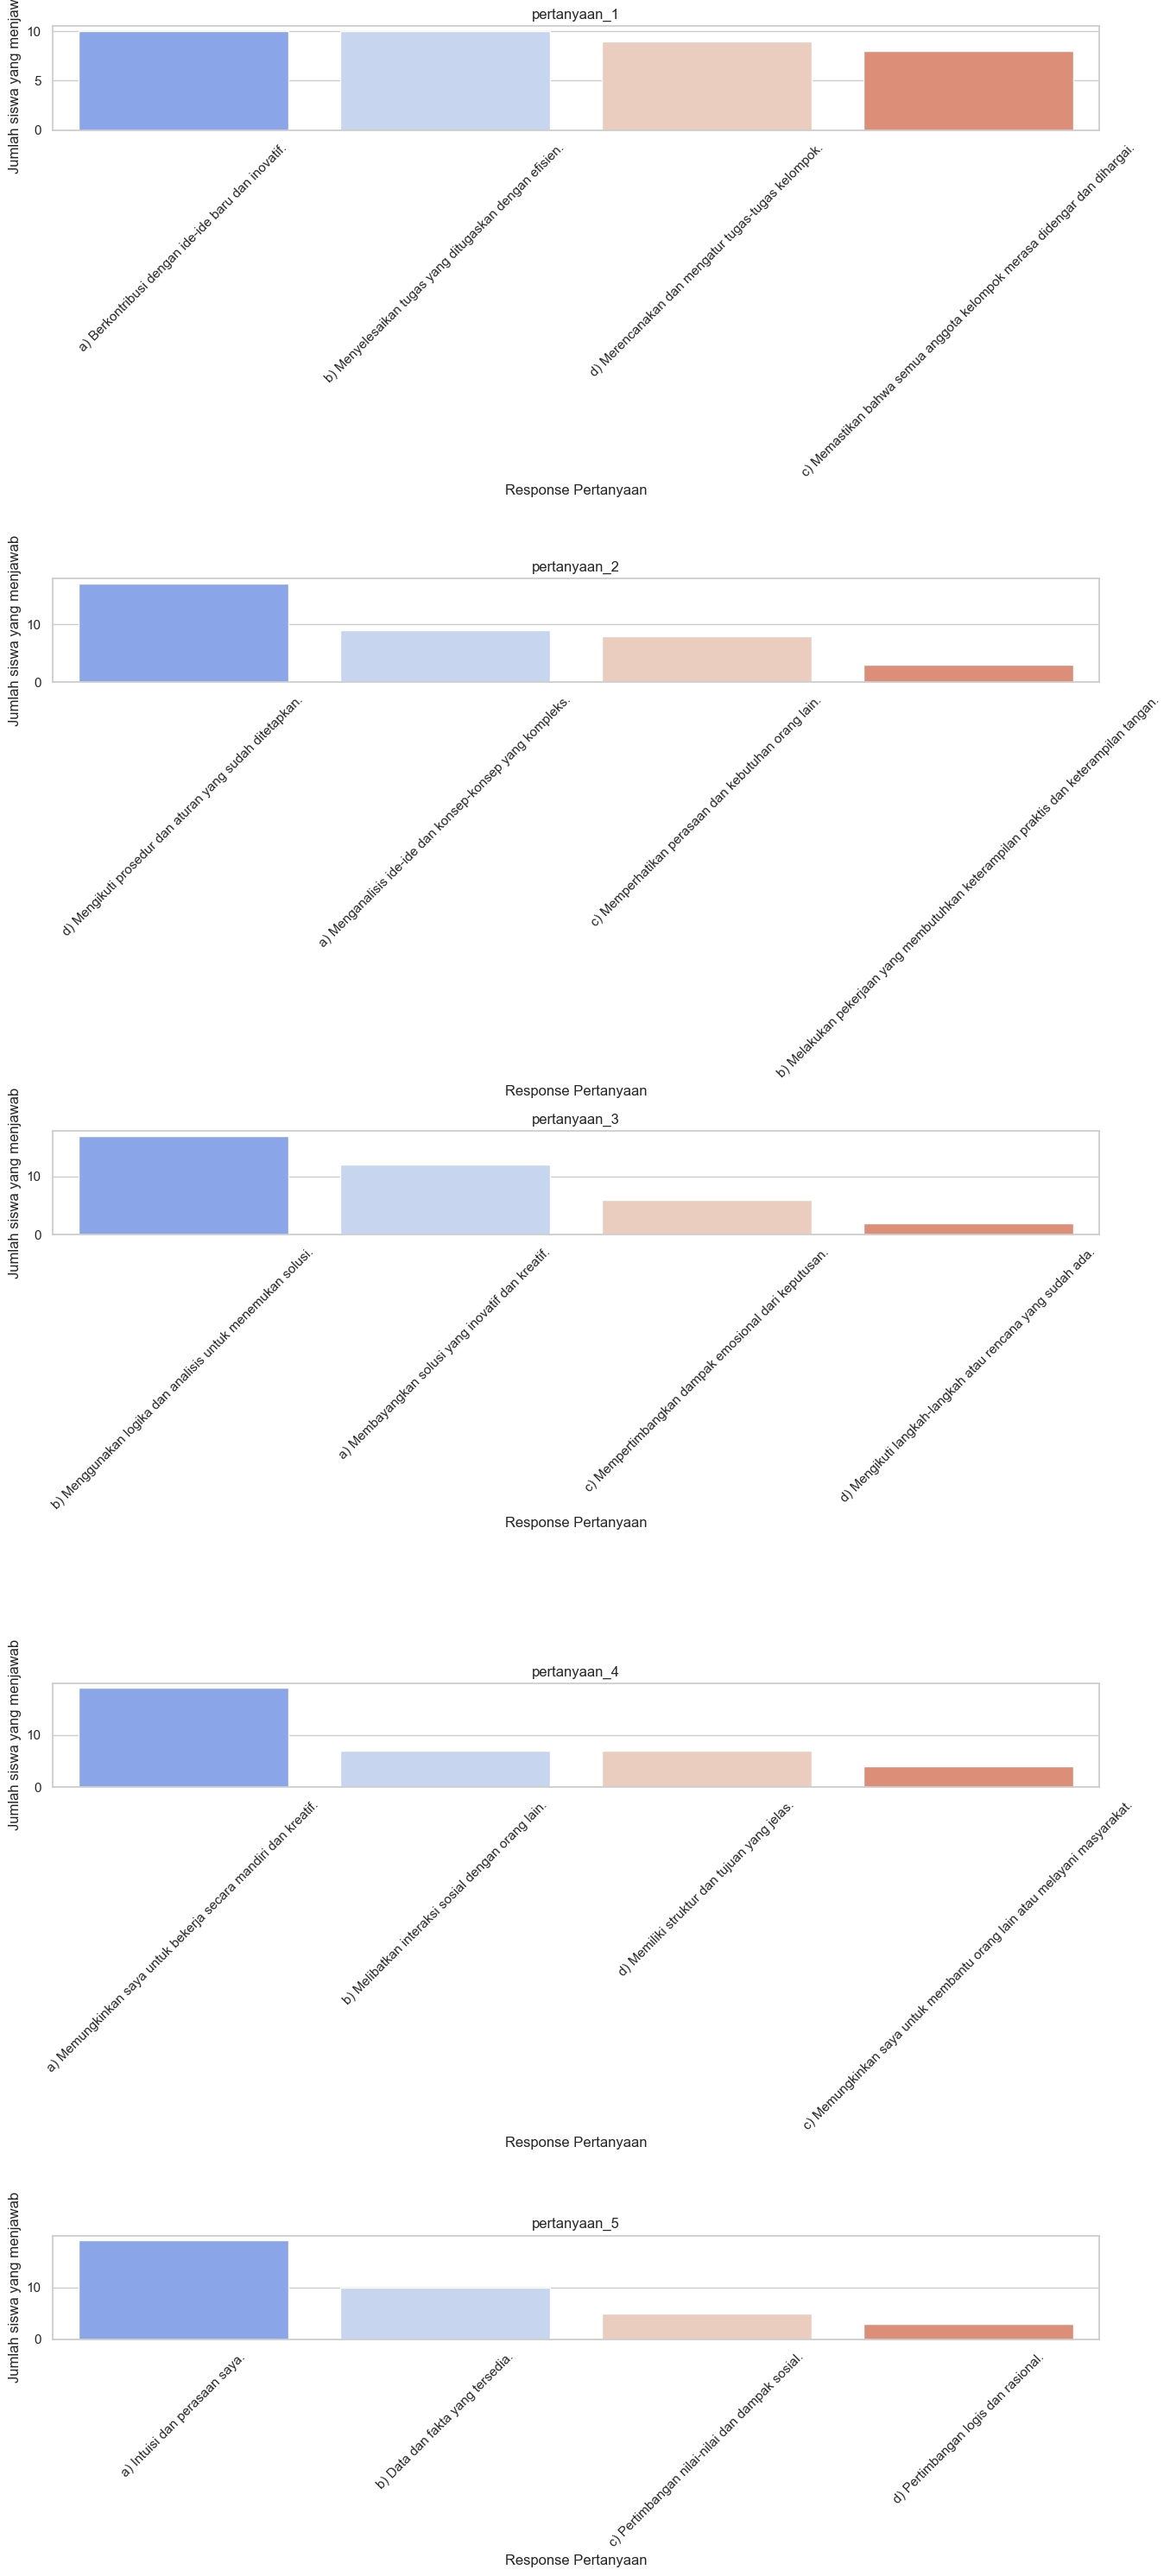

In [95]:
pertanyaan_data = data.drop('MBTI', axis=1)
hitung_pertanyaan = {question: pertanyaan_data[question].value_counts() for question in pertanyaan_data.columns}

# Menyiapkan gambar untuk memplot beberapa diagram batang
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 30))

for i, (question, counts) in enumerate(hitung_pertanyaan.items()):
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, ax=axes[i], palette='coolwarm', legend=False)
    axes[i].set_title(question)
    axes[i].set_ylabel('Jumlah siswa')
    axes[i].set_xlabel('Response Pertanyaan')
    axes[i].set_ylabel('Jumlah siswa yang menjawab')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


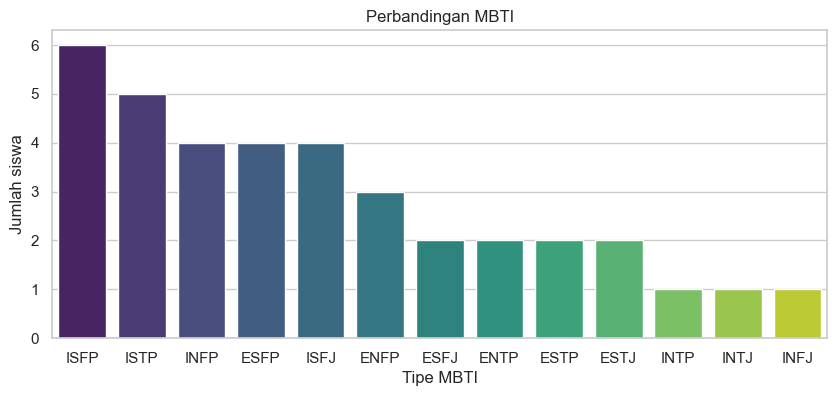

In [94]:
# visualisasi labels mbti
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
mbti_counts = data['MBTI'].value_counts()
sns.barplot(x=mbti_counts.index, y=mbti_counts.values, hue=mbti_counts.index, palette='viridis', legend=False)
plt.title('Perbandingan MBTI')
plt.xlabel('Tipe MBTI')
plt.ylabel('Jumlah siswa')
plt.show()

In [72]:
# mengonversi data encoder ke array numpy
encoder = OneHotEncoder()
data_encoder = encoder.fit_transform(data.drop('MBTI', axis=1))
data_encoder = data_encoder.toarray()
print(data_encoder)

[[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.

In [73]:
mbti_labels = pd.get_dummies(data['MBTI']).values
print(mbti_labels)

[[False False False False False False False  True False False False False
  False]
 [False False False False False False False False False False False  True
  False]
 [False False False False False False False False False  True False False
  False]
 [False False False False False False False False  True False False False
  False]
 [False False False False False False  True False False False False False
  False]
 [False False False False False False False False False False False  True
  False]
 [False False  True False False False False False False False False False
  False]
 [False False False False False False False  True False False False False
  False]
 [False  True False False False False False False False False False False
  False]
 [False False False  True False False False False False False False False
  False]
 [False False False False False  True False False False False False False
  False]
 [False False False False False False False False False False False  True
  False]
 [Fa